# 画bounding-box

## 示例图

In [1]:
import d2l_torch as d2l
import torch

%matplotlib inline

d2l.set_figsize()

老师说的这个买了版权的图像，可以在[这里](https://parsgraphic.ir/uploads/designs/ax11/787.jpg)下载

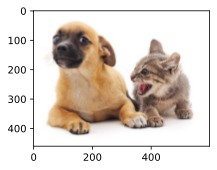

In [2]:
img=d2l.plt.imread("../../img/catdog.jpg")
d2l.plt.imshow(img)

## bounding-box表示转换

课程上讲过，常见的bounding-box的表示方式有：
+ 左上x，左上y，右下x，右下y
+ 左上x，左上y，宽，高

除此之外，其实还有一种常用的边界框表示方法
+ 是边界框中心(x,y)的轴坐标以及框的宽度和高度
+ 中心点的x，中心点的y，宽度，高度

下面定义两个函数来进行这两种bounding-box表示之间的转换，主要是用来画图用的

In [3]:
def box_to_corner(boxes):
    """
    从(左上，右下)的表示变成，(中心的x，y,宽,高)
    
    args
    boxes:一个二维数组，有4列，分别表示(左，上，右，下)，每行是一个box
    """
    x1,y1,x2,y2=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    cx=(x1+x2)/2
    cy=(y1+y2)/2
    cw=x2-x1
    ch=y2-y1
    
    boxes=torch.stack((cx,cy,cw,ch),axis=-1)
    return boxes
    

def corner_to_box(boxes):
    """
    从(中心的x，y,宽,高)的表示变成，(左上，右下)
    
    args
    boxes:一个二维数组，有4列，分别表示(中心的x，y,宽,高)，每行是一个box
    """
    cx,cy,cw,ch=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    x1=cx-cw/2
    x2=cx+cw/2
    y1=cy-ch/2
    y2=cy+ch/2
    
    boxes=torch.stack((x1,y1,x2,y2),axis=-1)
    return boxes

In [6]:
a=torch.tensor((1.0,2.0,3.0))
b=torch.tensor((2.0,4.0,6.0))
rs=torch.stack((a,b),dim=0)
print(rs)

rs2=torch.stack((a,b),dim=1)
print(rs2)

rs3=torch.stack((a,b),axis=-1)
print(rs3)

tensor([[1., 2., 3.],
        [2., 4., 6.]])
tensor([[1., 2.],
        [2., 4.],
        [3., 6.]])
tensor([[1., 2.],
        [2., 4.],
        [3., 6.]])


参考：
+ <https://blog.csdn.net/xinjieyuan/article/details/105205326>
+ <https://blog.csdn.net/Castlehe/article/details/116022827>